# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "/Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"
# dataDir = "G:AV datasets/inD-dataset-v1.0/data"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")
from joblib import Parallel, delayed
from extractors.loader import Loader
from extractors.LocationData import LocationData

In [5]:
loader = Loader(dataDir, 'inD')
loader.locationToRecordingIds

{4: [0, 1, 2, 3, 4, 5, 6],
 1: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 2: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 3: [30, 31, 32]}

# Step 1: Load all the location data, downsample them, extract SceneData and save location data


In [ ]:
# No Job Lib Version
# locations = [1, 2, 3, 4]
# locDataList = []

# for loc in locations:
#     locData = loader.getLocationData(loc, useSceneConfigToExtract=True, downSampleFps=10)
#     locData.save("../data") # whole thing as a dill object
    # locDataList.append(locData)

In [ ]:
# Job lib version
# locations = [1, 2, 3, 4]
# locDataList = Parallel(n_jobs=4)(
#         delayed(loader.getLocationData)(loc, useSceneConfigToExtract=True, downSampleFps=10) for loc in locations
# )
# for locData in locDataList:
#     locData.save("../data")

# Step 2: Clip Trajectories, find fast pedestrians, build local trajectories

In [103]:
# we can also load loc data using this: 
locDataList = [
    LocationData.load("../data/location-1", "2023-05-04-fps-10-all.dill"),
    LocationData.load("../data/location-2", "2023-05-04-fps-10-all.dill"),
    LocationData.load("../data/location-3", "2023-05-04-fps-10-all.dill"),
    LocationData.load("../data/location-4", "2023-05-04-fps-10-all.dill")
]
# for locDataFromFile in locDataList:
#     locDataFromFile.buildLocalInformationForScenes()
    

In [105]:
# Job lib version
_ = Parallel(n_jobs=4)(
        delayed(locData.buildLocalInformationForScenes)() for locData in locDataList
)

UnboundLocalError: local variable 'ids' referenced before assignment

### Step 3. Save everything

In [ ]:
for locData in locDataList:
    locData.saveCrossingDf("../data")
    locData.saveSceneDataOnly("../data")
    locData.save("../data") # whole thing as a dill object

## Step 4: Analyze problem tracks

In [7]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [ ]:
for locData in locDataList:
    sceneIds = locData.getSceneIds()
    # print(sceneIds)
    if locData.locationId == 2:
        sceneIds.remove('140') # somethig is fishy
        
    # print(sceneIds)
    for sceneId in sceneIds:
        
        sceneData = locData.getSceneData(sceneId) # loads precomputed
#         print("scene id", sceneId)
#         print(sceneData.warnings)
#         print(sceneData.problematicIds)
        visualizer.showSceneProblems(sceneData)

In [ ]:
pedDf.describe()

In [8]:
loc2Data = locDataList[1]
loc2Data.locationId

2

In [97]:
sceneData= loc2Data.getSceneData(240)
sceneData.buildLocalInformation(loc2Data.transformer, loc2Data.cleaner, force=True)
# pedDf = scene210.getPedDataInSceneCoordinates()
# pedDf.describe()

INFO:root:SceneData 240: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:getOutliersBySpeed: using range (0.0, 3.0)
INFO:root:Scene 240: clipping original data
clipping ped trajectories for scene # 240 with width offset 4.0: 100%|███████████████| 185/185 [00:12<00:00, 14.45it/s]
INFO:root:Scene 240: transforming trajectories to scene coordinates
INFO:root:Scene 240: adding dynamics (velocity, acceleration) in scene coordinates
INFO:root:Scene 240: trimming head and tail


18061 69
18128 142
18185 74
18211 84
18262 113
18299 100
18365 109
18375 77
19034 149
19047 92
19053 101
19090 67
19112 102
19157 119
19203 81
19211 79
19233 90
19281 59
19282 78
19283 105
20054 134
20060 107
20095 69
20169 78
20232 91
20260 83
20265 75
20339 36
20377 60
20402 76
20432 128
20460 68
21001 111
21003 81
21089 84
21115 84
21119 64
21120 69
21121 81
21128 129
21132 84
21158 74
21175 76
21217 86
21250 244
21299 93
21326 101
21463 88
21486 83
21510 115
21526 71
21531 137
21537 76
22042 75
22151 111
22263 77
22265 99
22292 92
22303 86
22313 97
22314 102
22497 124
22510 107
22519 32
22540 90
23089 99
23090 99
23118 49
23121 191
23136 93
23153 145
23169 88
23199 28
23201 67
23281 81
23315 140
23353 83
23356 162
23357 137
23359 149
23412 73
23485 84
23511 96
23512 115
24002 99
24037 261
24072 145
24073 93
24108 135
24188 82
24234 68
24241 82
24244 89
24283 91
24342 47
24343 50
25093 158
25094 183
25123 75
25143 101
25148 67
25195 114
25250 83
25288 94
25300 125
25358 82
25405 465

INFO:root:Scene 240: clipping trimmed data


29001 82
29069 83
29112 85
29119 79
29196 76
29201 84
29202 88
29216 98
29218 110
29221 98
29256 95
29261 156
29266 93
29319 126
29401 105
29418 90
29453 91
29478 59
29539 80
29542 102
29547 175
29548 178
29561 133
29566 105
29577 79


clipping ped trajectories for scene # 240 with width offset 0.0:  64%|█████████▌     | 119/186 [00:02<00:01, 58.60it/s]

input df len 129
clipped df len 73


clipping ped trajectories for scene # 240 with width offset 0.0: 100%|███████████████| 186/186 [00:03<00:00, 53.31it/s]
INFO:root:Scene 240: building clipped track meta


pedestrian 27530: enters the scene 2 times
pedestrian 21250: enters the scene 2 times
pedestrian 21250: Disregarding as the length 0.030016637053472107 is too short or rows too less (10)
pedestrian 27530000: ERROR: No clipped trajectory
pedestrian 27530000: ERROR: No valid clipped trajectory
Ped 27530000: is lost due to clipping. Check raw data
Clipping after trimming lost 1 pedestrian tracks: {27530000}
problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x0000023C752AA940>, {'fast_pedestrian': set(), 'pedestrian': {27530000}, <TrackClass.Pedestrian: 'pedestrian'>: {27530000}})


In [100]:
sceneData.problematicIds

defaultdict(<function extractors.SceneData.SceneData.buildLocalInformation.<locals>.<lambda>()>,
            {'fast_pedestrian': set(),
             'pedestrian': {27530000},
             <TrackClass.Pedestrian: 'pedestrian'>: {27530000}})

In [101]:
sceneData.warnings

['pedestrian 27530: enters the scene 2 times',
 'pedestrian 21250: enters the scene 2 times',
 'pedestrian 21250: Disregarding as the length 0.030016637053472107 is too short or rows too less (10)',
 'pedestrian 27530000: ERROR: No clipped trajectory',
 'pedestrian 27530000: ERROR: No valid clipped trajectory',
 'Ped 27530000: is lost due to clipping. Check raw data',
 'Clipping after trimming lost 1 pedestrian tracks: {27530000}']

In [65]:
loc2Data.cleaner.maxSpeed

3.0

In [87]:
# sceneData._clipPed(crossingOffset = sceneData.CROSSING_CLIP_OFFSET_BEFORE_DYNAMICS, onFull=True, ids=[27530]) 
# print(len(sceneData._clippedPedData[sceneData._clippedPedData["uniqueTrackId"] == 27530001]))
# print(len(sceneData._clippedPedData))
# print(sceneData._clippedPedData["uniqueTrackId"].unique())

clipping ped trajectories for scene # 240 with width offset 4.0: 100%|███████████████████| 1/1 [00:00<00:00, 12.05it/s]

133
160
[27530000 27530001]


In [96]:
sceneData._clippedPedData[sceneData._clippedPedData["uniqueTrackId"] == 27530001]

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,...,uniqueTrackId,sceneId,roadWidth,speed,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
5402,622704,27,530,29724,482,43.8891,-13.27893,240.54122,0.0,0.0,...,27530001,240,6.0,0.565360,3.203921,-2.962531,0.124111,-0.345640,0.005950,0.091245
5403,622705,27,530,29726,484,43.85444,-13.3474,240.24323,0.0,0.0,...,27530001,240,6.0,0.597534,3.179683,-2.889717,0.121190,-0.364073,0.014608,0.092168
5404,622706,27,530,29728,486,43.81795,-13.41761,239.92671,0.0,0.0,...,27530001,240,6.0,0.627062,3.155497,-2.814377,0.120929,-0.376697,0.001305,0.063116
5405,622707,27,530,29730,488,43.78042,-13.48906,239.59328,0.0,0.0,...,27530001,240,6.0,0.654003,3.131163,-2.737427,0.121673,-0.384754,-0.003718,0.040289
5406,622708,27,530,29732,490,43.74178,-13.56065,239.24472,0.0,0.0,...,27530001,240,6.0,0.678625,3.107510,-2.659589,0.118263,-0.389189,0.017047,0.022175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,622772,27,530,29860,618,40.25097,-17.61976,221.67358,0.0,0.0,...,27530001,240,6.0,1.255496,2.681440,2.677132,-0.029434,-0.455692,0.018049,-0.003807
5471,622773,27,530,29862,620,40.18067,-17.67974,221.54314,0.0,0.0,...,27530001,240,6.0,1.275946,2.688319,2.769287,-0.034396,-0.460770,0.024811,0.025392
5472,622774,27,530,29864,622,40.10869,-17.73945,221.43122,0.0,0.0,...,27530001,240,6.0,1.295929,2.696573,2.862444,-0.041268,-0.465787,0.034358,0.025082
5473,622775,27,530,29866,624,40.03402,-17.79946,221.3386,0.0,0.0,...,27530001,240,6.0,1.313055,2.706507,2.957723,-0.049670,-0.476396,0.042009,0.053047


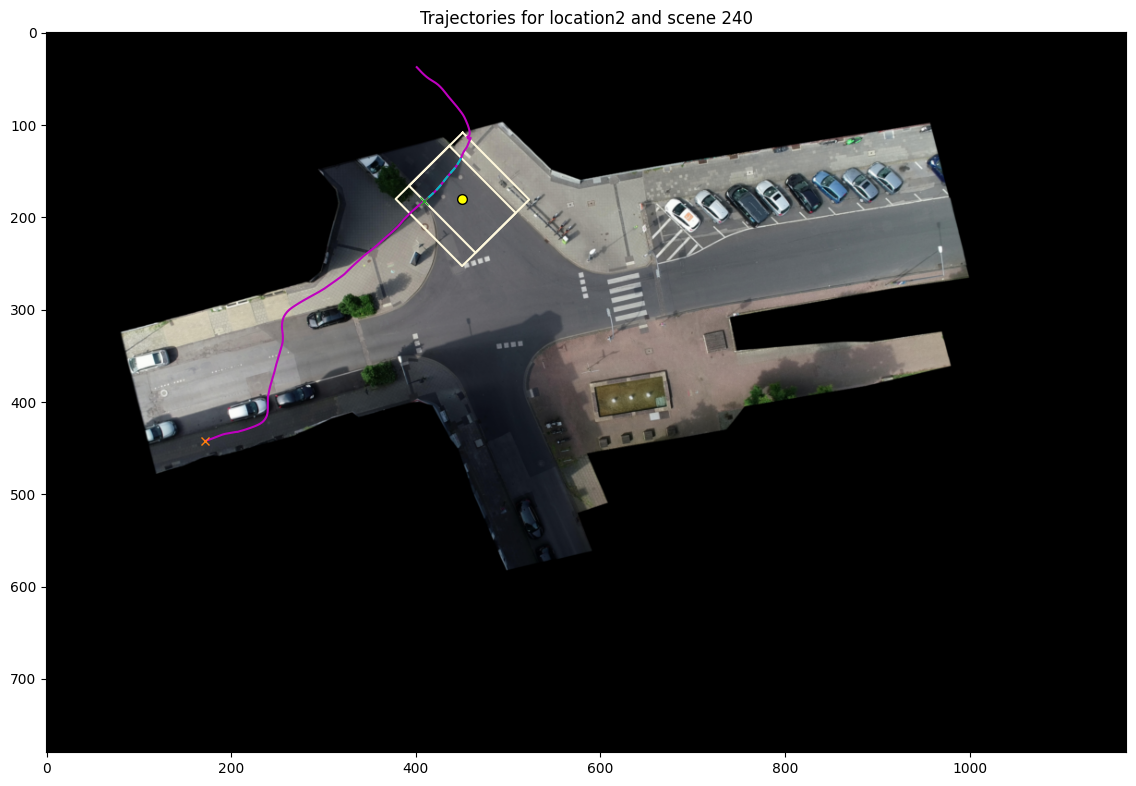

In [98]:

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showOthers=False, ids=[27530001])

In [90]:
sceneData._trimHeadAndTailForLocal()
sceneData._clippedPedData[sceneData._clippedPedData["uniqueTrackId"] == 27530001]

INFO:root:Scene 240: trimming head and tail


_trimHeadAndTailForLocal [27530000 27530001]


,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,speed
29,622669,27,530,29654,412,44.78085,-11.45451,243.58074,0.0,0.0,-0.23917,-0.62092,-0.14301,-0.37839,27530001,240,6.0,0.338237
30,622670,27,530,29656,414,44.7607,-11.50669,243.64519,0.0,0.0,-0.24844,-0.65476,-0.12869,-0.31332,27530001,240,6.0,0.351347
31,622671,27,530,29658,416,44.73956,-11.56193,243.68969,0.0,0.0,-0.25592,-0.68186,-0.11792,-0.24161,27530001,240,6.0,0.361926
32,622672,27,530,29660,418,44.71888,-11.61964,243.71393,0.0,0.0,-0.26247,-0.70138,-0.1115,-0.16573,27530001,240,6.0,0.371189
33,622673,27,530,29662,420,44.69839,-11.67919,243.71808,0.0,0.0,-0.26913,-0.71258,-0.10907,-0.08885,27530001,240,6.0,0.380607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,622793,27,530,29902,660,38.78512,-18.84105,222.75305,0.0,0.0,-0.71203,-0.64596,0.15645,0.04838,27530001,240,6.0,1.006962
154,622794,27,530,29904,662,38.72747,-18.89197,222.9455,0.0,0.0,-0.69333,-0.63751,0.12861,0.0177,27530001,240,6.0,0.980517
155,622795,27,530,29906,664,38.67336,-18.94127,223.14149,0.0,0.0,-0.6773,-0.63282,0.09009,-0.02034,27530001,240,6.0,0.957847
156,622796,27,530,29908,666,38.62149,-18.98988,223.3394,0.0,0.0,-0.66592,-0.63285,0.04225,-0.06358,27530001,240,6.0,0.941753


In [85]:

sceneData._clipPed(crossingOffset = sceneData.CROSSING_CLIP_OFFSET_AFTER_DYNAMICS, onFull=False, ids=[27530001]) 

clipping ped trajectories for scene # 240 with width offset 0.0: 100%|███████████████████| 1/1 [00:00<00:00, 49.94it/s]


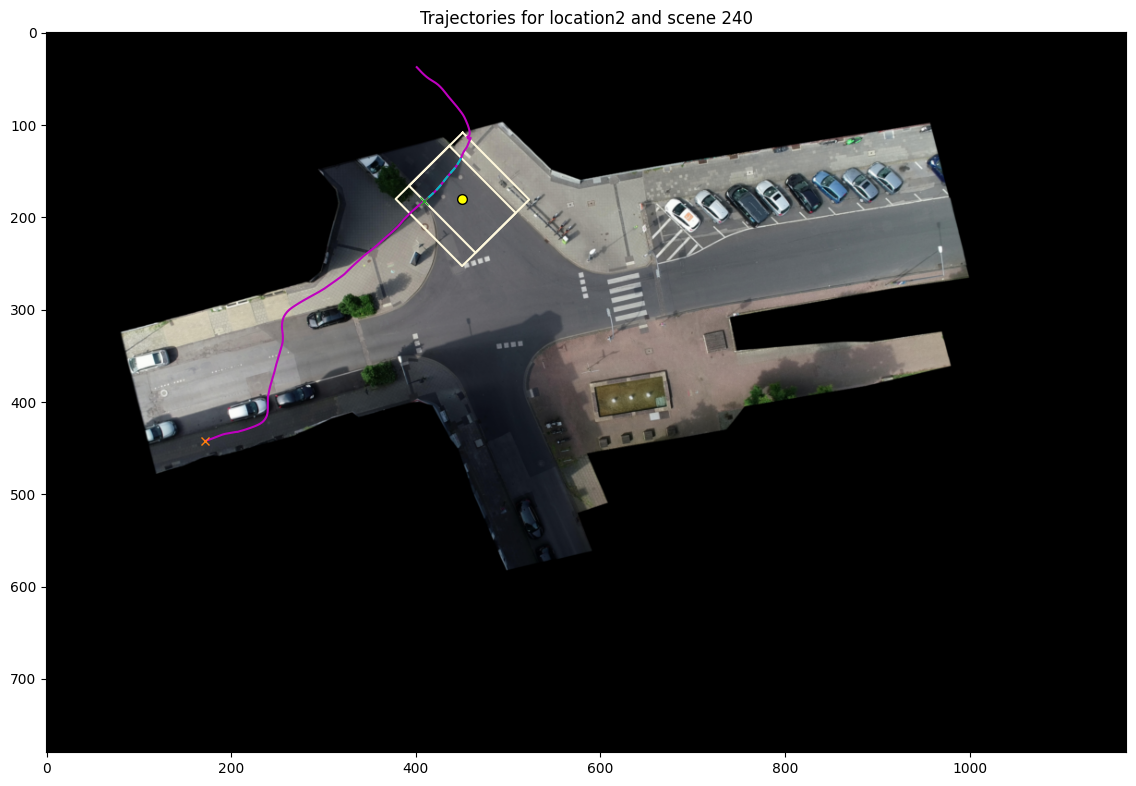

In [99]:

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showOthers=False, ids=[27530001])